In [170]:
import pandas as pd
import numpy as np
import feather
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from kmodes.kmodes import KModes


%matplotlib inline

In [171]:
pingfInfoFilePath = './data/dv_personas_190411_abt'
dv_personas_190411_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,21.0,2d2f9c8a7e3c780fef578a2be45f60d537480aeaf01a88...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Título Universitario,Ninguno,32,78.0,0b7cafeb91821d6c39ccc2f3058edd9c77f351f0047f1a...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
dv_personas_190411_model.drop(['dni'],axis=1,inplace = True)

#### Procedemos a dividir el tto_pcto_dias_trabajados en bloques de 33

In [173]:
tto_pcto_dias_trabajados_bucket_array = np.linspace(0,100,4)
tto_pcto_dias_trabajados_bucket_array

array([  0.        ,  33.33333333,  66.66666667, 100.        ])

In [174]:
dv_personas_190411_model_33 = dv_personas_190411_model.copy()
dv_personas_190411_model_33['tto_pcto_dias_trabajados'] = pd.cut(dv_personas_190411_model['tto_pcto_dias_trabajados'],tto_pcto_dias_trabajados_bucket_array,include_lowest=True)
dv_personas_190411_model_33.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,"(-0.001, 33.333]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,"(-0.001, 33.333]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,"(-0.001, 33.333]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,"(33.333, 66.667]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Título Universitario,Ninguno,32,"(66.667, 100.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
le = preprocessing.LabelEncoder()
dv_personas_190411_model_33_le = dv_personas_190411_model_33.apply(le.fit_transform)
dv_personas_190411_model_33_le.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,1,11,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,11,1,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,11,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,13,1,11,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
km_cao_33 = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao_33 = km_cao_33.fit_predict(dv_personas_190411_model_33_le)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2794, cost: 39933.0
Run 1, iteration: 2/100, moves: 1244, cost: 39933.0


In [177]:
fitClusters_cao_33

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [178]:
dv_personas_190411_model_33 = dv_personas_190411_model_33.reset_index()
dv_personas_190411_model_33.head()

,index,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,0,M,Selectividad,Ninguno,21,"(-0.001, 33.333]",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,M,Selectividad,Ninguno,26,"(-0.001, 33.333]",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,M,Acceso a Segundo Ciclo,Ninguno,24,"(-0.001, 33.333]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,H,Selectividad,Ninguno,21,"(33.333, 66.667]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,M,Título Universitario,Ninguno,32,"(66.667, 100.0]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
clustersDf_33 = pd.DataFrame(fitClusters_cao_33)
clustersDf_33.columns = ['cluster_predicted']
combinedDf_33 = pd.concat([dv_personas_190411_model_33, clustersDf_33], axis = 1).reset_index()
combinedDf_33 = combinedDf_33.drop(['index', 'level_0'], axis = 1)
combinedDf_33.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA,cluster_predicted
0,M,Selectividad,Ninguno,21,"(-0.001, 33.333]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,"(-0.001, 33.333]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,"(-0.001, 33.333]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,"(33.333, 66.667]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M,Título Universitario,Ninguno,32,"(66.667, 100.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
combinedDf_33.cluster_predicted.value_counts()

0    11224
1     2874
2      222
Name: cluster_predicted, dtype: int64

In [181]:
combinedDf_33_0 = combinedDf_33[combinedDf_33['cluster_predicted']==0]
combinedDf_33_0.tto_pcto_dias_trabajados.value_counts()

(-0.001, 33.333]    8643
(33.333, 66.667]    2048
(66.667, 100.0]      533
Name: tto_pcto_dias_trabajados, dtype: int64

Agrupa bien un 77% de los datos apróximadamente

In [182]:
combinedDf_33_1 = combinedDf_33[combinedDf_33['cluster_predicted']==1]
combinedDf_33_1.tto_pcto_dias_trabajados.value_counts()

(33.333, 66.667]    1938
(-0.001, 33.333]     563
(66.667, 100.0]      373
Name: tto_pcto_dias_trabajados, dtype: int64

Agrupa bien un 71% de los datos apróximadamente

In [183]:
combinedDf_33_2 = combinedDf_33[combinedDf_33['cluster_predicted']==2]
combinedDf_33_2.tto_pcto_dias_trabajados.value_counts()

(66.667, 100.0]     115
(-0.001, 33.333]     80
(33.333, 66.667]     27
Name: tto_pcto_dias_trabajados, dtype: int64

Agrupa bien un 67% de los datos apróximadamente

En total, agrupamos un 76% de los datos correctamente

In [184]:
combinedDf_33.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA,cluster_predicted
0,M,Selectividad,Ninguno,21,"(-0.001, 33.333]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,"(-0.001, 33.333]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,"(-0.001, 33.333]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,"(33.333, 66.667]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M,Título Universitario,Ninguno,32,"(66.667, 100.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
combinedDf_33_0_le = combinedDf_33_0.copy()
combinedDf_33_0_le['tto_pcto_dias_trabajados'] = le.fit_transform(combinedDf_33_0['tto_pcto_dias_trabajados'])
combinedDf_33_0_real = combinedDf_33_0_le[combinedDf_33_0_le['tto_pcto_dias_trabajados']==0]
df_titulaciones_33_0 = pd.DataFrame({'titulacion': [], 'frecuencia': []})
for col in combinedDf_33_0_real.columns:
    if 'Titulacion_is_' in col:
        if combinedDf_33_0_real[combinedDf_33_0_real[col] == 1].shape[0] != 0:
            df_titulaciones_33_0 = df_titulaciones_33_0.append({'titulacion':col.replace('Titulacion_is_',''),'frecuencia':combinedDf_33_0_real[combinedDf_33_0_real[col] == 1].shape[0]},ignore_index=True)
df_titulaciones_33_0.head()

,titulacion,frecuencia
0,GRADO EN EDUCACIÓN PRIMARIA,757.0
1,ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. C...,74.0
2,INGENIERO QUÍMICO,46.0
3,INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EX...,32.0
4,GRADO EN MEDICINA,60.0


In [186]:
df_titulaciones_33_0.to_csv('../../datasets_editados/df_titulaciones_33_0.csv',header=True,index=False,sep='|')
combinedDf_33_0_real.to_csv('../../datasets_editados/combinedDf_33_0_real.csv',header=True,index=False,sep='|')

In [187]:
combinedDf_33_1_le = combinedDf_33_1.copy()
combinedDf_33_1_le['tto_pcto_dias_trabajados'] = le.fit_transform(combinedDf_33_1['tto_pcto_dias_trabajados'])
combinedDf_33_1_real = combinedDf_33_1_le[combinedDf_33_1_le['tto_pcto_dias_trabajados']==1]
df_titulaciones_33_1 = pd.DataFrame({'titulacion': [], 'frecuencia': []})
for col in combinedDf_33_1_real.columns:
    if 'Titulacion_is_' in col:
        if combinedDf_33_1_real[combinedDf_33_1_real[col] == 1].shape[0] != 0:
            df_titulaciones_33_1 = df_titulaciones_33_1.append({'titulacion':col.replace('Titulacion_is_',''),'frecuencia':combinedDf_33_1_real[combinedDf_33_1_real[col] == 1].shape[0]},ignore_index=True)
df_titulaciones_33_1.head()

,titulacion,frecuencia
0,GRADO EN EDUCACIÓN PRIMARIA,93.0
1,ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. C...,19.0
2,INGENIERO QUÍMICO,14.0
3,INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EX...,12.0
4,GRADO EN MEDICINA,11.0


In [188]:
df_titulaciones_33_1.to_csv('../../datasets_editados/df_titulaciones_33_1.csv',header=True,index=False,sep='|')
combinedDf_33_1_real.to_csv('../../datasets_editados/combinedDf_33_1_real.csv',header=True,index=False,sep='|')

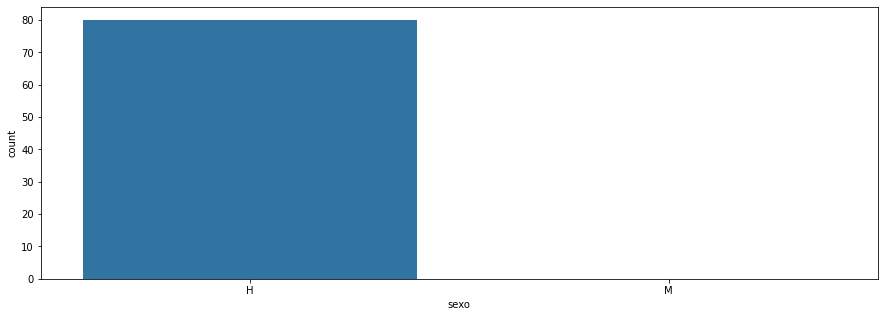

In [192]:
combinedDf_33_2_le = combinedDf_33_2.copy()
combinedDf_33_2_le['tto_pcto_dias_trabajados'] = le.fit_transform(combinedDf_33_2['tto_pcto_dias_trabajados'])
combinedDf_33_2_false = combinedDf_33_2_le[combinedDf_33_2_le['tto_pcto_dias_trabajados']==0]
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf_33_2_false['sexo'],order=combinedDf_33_2_false['sexo'].value_counts().index)
plt.show()

In [193]:
combinedDf_33_2_false['sexo'].value_counts()

H    80
M     0
Name: sexo, dtype: int64

In [189]:
combinedDf_33_2_le = combinedDf_33_2.copy()
combinedDf_33_2_le['tto_pcto_dias_trabajados'] = le.fit_transform(combinedDf_33_2['tto_pcto_dias_trabajados'])
combinedDf_33_2_real = combinedDf_33_2_le[combinedDf_33_2_le['tto_pcto_dias_trabajados']==2]
df_titulaciones_33_2 = pd.DataFrame({'titulacion': [], 'frecuencia': []})
for col in combinedDf_33_2_real.columns:
    if 'Titulacion_is_' in col:
        if combinedDf_33_2_real[combinedDf_33_2_real[col] == 1].shape[0] != 0:
            df_titulaciones_33_2 = df_titulaciones_33_2.append({'titulacion':col.replace('Titulacion_is_',''),'frecuencia':combinedDf_33_2_real[combinedDf_33_2_real[col] == 1].shape[0]},ignore_index=True)
df_titulaciones_33_2.head()

,titulacion,frecuencia
0,INGENIERO QUÍMICO,1.0
1,INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ...,1.0
2,DIPLOMADO EN ENFERMERÍA,1.0
3,DIPLOMADO EN TERAPIA OCUPACIONAL,1.0
4,LICENCIADO EN DERECHO,2.0


In [168]:
df_titulaciones_33_2.to_csv('../../datasets_editados/df_titulaciones_33_2.csv',header=True,index=False,sep='|')
combinedDf_33_2_real.to_csv('../../datasets_editados/combinedDf_33_2_real.csv',header=True,index=False,sep='|')

#### Procedemos a dividir el tto_pcto_dias_trabajados en bloques de 25

In [15]:
tto_pcto_dias_trabajados_bucket_array = np.linspace(0,100,5)
tto_pcto_dias_trabajados_bucket_array

array([  0.,  25.,  50.,  75., 100.])

In [16]:
dv_personas_190411_model_25 = dv_personas_190411_model.copy()
dv_personas_190411_model_25['tto_pcto_dias_trabajados'] = pd.cut(dv_personas_190411_model['tto_pcto_dias_trabajados'],tto_pcto_dias_trabajados_bucket_array,include_lowest=True)
dv_personas_190411_model_25.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,"(-0.001, 25.0]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,"(25.0, 50.0]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,"(-0.001, 25.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,"(25.0, 50.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Título Universitario,Ninguno,32,"(75.0, 100.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dv_personas_190411_model_25_le = dv_personas_190411_model_25.apply(le.fit_transform)
dv_personas_190411_model_25_le.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,1,11,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,11,1,5,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,11,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,13,1,11,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
km_cao_25 = KModes(n_clusters=4, init = "Cao", n_init = 10, verbose=1)

fitClusters_cao_25 = km_cao_25.fit_predict(dv_personas_190411_model_25_le)
fitClusters_cao_25

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3394, cost: 40644.0
Run 1, iteration: 2/100, moves: 1476, cost: 40644.0


array([0, 3, 0, ..., 0, 0, 0], dtype=uint16)

In [19]:
dv_personas_190411_model_25 = dv_personas_190411_model_25.reset_index()
dv_personas_190411_model_25.head()

,index,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,0,M,Selectividad,Ninguno,21,"(-0.001, 25.0]",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,M,Selectividad,Ninguno,26,"(25.0, 50.0]",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,M,Acceso a Segundo Ciclo,Ninguno,24,"(-0.001, 25.0]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,H,Selectividad,Ninguno,21,"(25.0, 50.0]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,M,Título Universitario,Ninguno,32,"(75.0, 100.0]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
clustersDf_25 = pd.DataFrame(fitClusters_cao_25)
clustersDf_25.columns = ['cluster_predicted']
combinedDf_25 = pd.concat([dv_personas_190411_model_25, clustersDf_25], axis = 1).reset_index()
combinedDf_25 = combinedDf_25.drop(['index', 'level_0'], axis = 1)
combinedDf_25.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA,cluster_predicted
0,M,Selectividad,Ninguno,21,"(-0.001, 25.0]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,"(25.0, 50.0]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
2,M,Acceso a Segundo Ciclo,Ninguno,24,"(-0.001, 25.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,"(25.0, 50.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,M,Título Universitario,Ninguno,32,"(75.0, 100.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
combinedDf_25.tto_pcto_dias_trabajados.value_counts()

(-0.001, 25.0]    7497
(25.0, 50.0]      4319
(50.0, 75.0]      1966
(75.0, 100.0]      538
Name: tto_pcto_dias_trabajados, dtype: int64

In [22]:
combinedDf_25_0 = combinedDf_25[combinedDf_25['cluster_predicted']==0]
combinedDf_25_0.tto_pcto_dias_trabajados.value_counts()

(-0.001, 25.0]    6829
(25.0, 50.0]      2081
(50.0, 75.0]      1148
(75.0, 100.0]      307
Name: tto_pcto_dias_trabajados, dtype: int64

65%

In [23]:
combinedDf_25_1 = combinedDf_25[combinedDf_25['cluster_predicted']==1]
combinedDf_25_1.tto_pcto_dias_trabajados.value_counts()

(25.0, 50.0]      1984
(50.0, 75.0]       752
(-0.001, 25.0]     541
(75.0, 100.0]      223
Name: tto_pcto_dias_trabajados, dtype: int64

56%

In [24]:
combinedDf_25_2 = combinedDf_25[combinedDf_25['cluster_predicted']==2]
combinedDf_25_2.tto_pcto_dias_trabajados.value_counts()

(50.0, 75.0]      1
(75.0, 100.0]     0
(25.0, 50.0]      0
(-0.001, 25.0]    0
Name: tto_pcto_dias_trabajados, dtype: int64

100%

In [25]:
combinedDf_25_3 = combinedDf_25[combinedDf_25['cluster_predicted']==3]
combinedDf_25_3.tto_pcto_dias_trabajados.value_counts()

(25.0, 50.0]      254
(-0.001, 25.0]    127
(50.0, 75.0]       65
(75.0, 100.0]       8
Name: tto_pcto_dias_trabajados, dtype: int64

4%

Estamos agrupando correctamente un 62%

#### Procedemos a dividir el tto_pcto_dias_trabajados en bloques de 20

In [26]:
tto_pcto_dias_trabajados_bucket_array = np.linspace(0,100,6)
tto_pcto_dias_trabajados_bucket_array

array([  0.,  20.,  40.,  60.,  80., 100.])

In [27]:
dv_personas_190411_model_20 = dv_personas_190411_model.copy()
dv_personas_190411_model_20['tto_pcto_dias_trabajados'] = pd.cut(dv_personas_190411_model['tto_pcto_dias_trabajados'],tto_pcto_dias_trabajados_bucket_array,include_lowest=True)
dv_personas_190411_model_20.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,"(20.0, 40.0]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,"(20.0, 40.0]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,"(20.0, 40.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,"(20.0, 40.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Título Universitario,Ninguno,32,"(60.0, 80.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dv_personas_190411_model_20_le = dv_personas_190411_model_25.apply(le.fit_transform)
dv_personas_190411_model_20_le.head()

,index,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,0,1,11,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,11,1,5,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,5,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,11,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,13,1,11,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
km_cao_20 = KModes(n_clusters=5, init = "Cao", n_init = 10, verbose=1)

fitClusters_cao_20 = km_cao_20.fit_predict(dv_personas_190411_model_20_le)
fitClusters_cao_20

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3429, cost: 54602.0
Run 1, iteration: 2/100, moves: 1565, cost: 54601.0
Run 1, iteration: 3/100, moves: 0, cost: 54601.0


array([0, 3, 0, ..., 0, 0, 0], dtype=uint16)

In [30]:
dv_personas_190411_model_20 = dv_personas_190411_model_20.reset_index()
dv_personas_190411_model_20.head()

,index,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,0,M,Selectividad,Ninguno,21,"(20.0, 40.0]",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,M,Selectividad,Ninguno,26,"(20.0, 40.0]",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,M,Acceso a Segundo Ciclo,Ninguno,24,"(20.0, 40.0]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,H,Selectividad,Ninguno,21,"(20.0, 40.0]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,M,Título Universitario,Ninguno,32,"(60.0, 80.0]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
clustersDf_20 = pd.DataFrame(fitClusters_cao_20)
clustersDf_20.columns = ['cluster_predicted']
combinedDf_20 = pd.concat([dv_personas_190411_model_20, clustersDf_20], axis = 1).reset_index()
combinedDf_20 = combinedDf_20.drop(['index', 'level_0'], axis = 1)
combinedDf_20.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA,cluster_predicted
0,M,Selectividad,Ninguno,21,"(20.0, 40.0]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,"(20.0, 40.0]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
2,M,Acceso a Segundo Ciclo,Ninguno,24,"(20.0, 40.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,"(20.0, 40.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,M,Título Universitario,Ninguno,32,"(60.0, 80.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
combinedDf_20.tto_pcto_dias_trabajados.value_counts()

(-0.001, 20.0]    6184
(20.0, 40.0]      4261
(40.0, 60.0]      2374
(60.0, 80.0]      1127
(80.0, 100.0]      374
Name: tto_pcto_dias_trabajados, dtype: int64

In [33]:
combinedDf_20_0 = combinedDf_20[combinedDf_20['cluster_predicted']==0]
combinedDf_20_0.tto_pcto_dias_trabajados.value_counts()

(-0.001, 20.0]    5588
(20.0, 40.0]      2591
(40.0, 60.0]      1238
(60.0, 80.0]       624
(80.0, 100.0]      201
Name: tto_pcto_dias_trabajados, dtype: int64

54%

In [34]:
combinedDf_20_1 = combinedDf_20[combinedDf_20['cluster_predicted']==1]
combinedDf_20_1.tto_pcto_dias_trabajados.value_counts()

(20.0, 40.0]      1410
(40.0, 60.0]       958
(-0.001, 20.0]     450
(60.0, 80.0]       429
(80.0, 100.0]      142
Name: tto_pcto_dias_trabajados, dtype: int64

42%

In [35]:
combinedDf_20_2 = combinedDf_20[combinedDf_20['cluster_predicted']==2]
combinedDf_20_2.tto_pcto_dias_trabajados.value_counts()

(60.0, 80.0]      1
(80.0, 100.0]     0
(40.0, 60.0]      0
(20.0, 40.0]      0
(-0.001, 20.0]    0
Name: tto_pcto_dias_trabajados, dtype: int64

100%

In [36]:
combinedDf_20_3 = combinedDf_20[combinedDf_20['cluster_predicted']==3]
combinedDf_20_3.tto_pcto_dias_trabajados.value_counts()

(20.0, 40.0]      191
(40.0, 60.0]      121
(-0.001, 20.0]    105
(60.0, 80.0]       32
(80.0, 100.0]       5
Name: tto_pcto_dias_trabajados, dtype: int64

30%

In [37]:
combinedDf_20_4 = combinedDf_20[combinedDf_20['cluster_predicted']==4]
combinedDf_20_4.tto_pcto_dias_trabajados.value_counts()

(20.0, 40.0]      69
(40.0, 60.0]      57
(60.0, 80.0]      41
(-0.001, 20.0]    41
(80.0, 100.0]     26
Name: tto_pcto_dias_trabajados, dtype: int64

11,58%

Casi el 50% estaríamos agrupando correctamente en total

### Probamos a realizar el clustering con la rama académica en vez de con la titulación 

In [38]:
pingfInfoFilePath = './data/dv_personas_190411_abt4'
dv_personas_190411_rama_acad_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_rama_acad_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,rama_acad,master,doctorado
0,M,Selectividad,Ninguno,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,Ingeniería y Arquitectura,True,True
1,H,Selectividad,Ninguno,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,Ciencias de la Salud,True,True
2,M,Selectividad,Ninguno,22,20.0,401d91e105d4ec88bb787fd80e08da5fa0f906d224588e...,Artes y Humanidades,True,True
3,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,Ciencias de la Salud,True,True
4,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,Ciencias Sociales y Jurídicas,True,True


In [39]:
dv_personas_190411_rama_acad_model.drop(['dni'],axis=1,inplace = True)

#### Procedemos a dividir el tto_pcto_dias_trabajados en bloques de 33

In [40]:
tto_pcto_dias_trabajados_bucket_array = np.linspace(0,100,4)
tto_pcto_dias_trabajados_bucket_array

array([  0.        ,  33.33333333,  66.66666667, 100.        ])

In [41]:
dv_personas_190411_rama_acad_model_33 = dv_personas_190411_rama_acad_model.copy()
dv_personas_190411_rama_acad_model_33['tto_pcto_dias_trabajados'] = pd.cut(dv_personas_190411_rama_acad_model['tto_pcto_dias_trabajados'],tto_pcto_dias_trabajados_bucket_array,include_lowest=True)
dv_personas_190411_rama_acad_model_33.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,rama_acad,master,doctorado
0,M,Selectividad,Ninguno,26,"(-0.001, 33.333]",Ingeniería y Arquitectura,True,True
1,H,Selectividad,Ninguno,21,"(33.333, 66.667]",Ciencias de la Salud,True,True
2,M,Selectividad,Ninguno,22,"(-0.001, 33.333]",Artes y Humanidades,True,True
3,M,Selectividad,Ninguno,23,"(-0.001, 33.333]",Ciencias de la Salud,True,True
4,M,Selectividad,Ninguno,22,"(33.333, 66.667]",Ciencias Sociales y Jurídicas,True,True


In [42]:
le = preprocessing.LabelEncoder()
dv_personas_190411_rama_acad_model_33_le = dv_personas_190411_rama_acad_model_33.apply(le.fit_transform)
dv_personas_190411_rama_acad_model_33_le.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,rama_acad,master,doctorado
0,1,6,1,5,0,4,0,0
1,0,6,1,0,1,3,0,0
2,1,6,1,1,0,0,0,0
3,1,6,1,2,0,3,0,0
4,1,6,1,1,1,2,0,0


In [43]:
fitClusters_cao_rama_acad_33 = km_cao_33.fit_predict(dv_personas_190411_rama_acad_model_33_le)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1555, cost: 22042.0
Run 1, iteration: 2/100, moves: 355, cost: 22042.0


In [44]:
fitClusters_cao_rama_acad_33

array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [45]:
dv_personas_190411_rama_acad_model_33 = dv_personas_190411_rama_acad_model_33.reset_index()
dv_personas_190411_rama_acad_model_33.head()

,index,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,rama_acad,master,doctorado
0,0,M,Selectividad,Ninguno,26,"(-0.001, 33.333]",Ingeniería y Arquitectura,True,True
1,1,H,Selectividad,Ninguno,21,"(33.333, 66.667]",Ciencias de la Salud,True,True
2,2,M,Selectividad,Ninguno,22,"(-0.001, 33.333]",Artes y Humanidades,True,True
3,3,M,Selectividad,Ninguno,23,"(-0.001, 33.333]",Ciencias de la Salud,True,True
4,4,M,Selectividad,Ninguno,22,"(33.333, 66.667]",Ciencias Sociales y Jurídicas,True,True


In [46]:
clustersDf_rama_acad_33 = pd.DataFrame(fitClusters_cao_rama_acad_33)
clustersDf_rama_acad_33.columns = ['cluster_predicted']
combinedDf_rama_acad_33 = pd.concat([dv_personas_190411_rama_acad_model_33, clustersDf_rama_acad_33], axis = 1).reset_index()
combinedDf_rama_acad_33 = combinedDf_rama_acad_33.drop(['index', 'level_0'], axis = 1)
combinedDf_rama_acad_33.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,rama_acad,master,doctorado,cluster_predicted
0,M,Selectividad,Ninguno,26,"(-0.001, 33.333]",Ingeniería y Arquitectura,True,True,0
1,H,Selectividad,Ninguno,21,"(33.333, 66.667]",Ciencias de la Salud,True,True,1
2,M,Selectividad,Ninguno,22,"(-0.001, 33.333]",Artes y Humanidades,True,True,0
3,M,Selectividad,Ninguno,23,"(-0.001, 33.333]",Ciencias de la Salud,True,True,0
4,M,Selectividad,Ninguno,22,"(33.333, 66.667]",Ciencias Sociales y Jurídicas,True,True,0


In [47]:
combinedDf_rama_acad_33.cluster_predicted.value_counts()

0    8663
1    2099
2    1964
Name: cluster_predicted, dtype: int64

In [48]:
combinedDf_rama_acad_33_0 = combinedDf_rama_acad_33[combinedDf_rama_acad_33['cluster_predicted']==0]
combinedDf_rama_acad_33_0.tto_pcto_dias_trabajados.value_counts()

(-0.001, 33.333]    6370
(33.333, 66.667]    1770
(66.667, 100.0]      523
Name: tto_pcto_dias_trabajados, dtype: int64

73%

In [49]:
combinedDf_rama_acad_33_1 = combinedDf_rama_acad_33[combinedDf_rama_acad_33['cluster_predicted']==1]
combinedDf_rama_acad_33_1.tto_pcto_dias_trabajados.value_counts()

(33.333, 66.667]    1660
(-0.001, 33.333]     331
(66.667, 100.0]      108
Name: tto_pcto_dias_trabajados, dtype: int64

79%

In [50]:
combinedDf_rama_acad_33_2 = combinedDf_rama_acad_33[combinedDf_rama_acad_33['cluster_predicted']==2]
combinedDf_rama_acad_33_2.tto_pcto_dias_trabajados.value_counts()

(-0.001, 33.333]    1724
(66.667, 100.0]      174
(33.333, 66.667]      66
Name: tto_pcto_dias_trabajados, dtype: int64

8,89%